In [1]:
"""This script can plot all log data for single simulation with single simulation types"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil

In [2]:
# Replace with your log file path
jid = 381882
skip_lines = 100                         # skipping first 100 lines 
log_file = f'Output.{jid}'

# Find the data section in the log file
with open(log_file, 'r') as f:
    lines = f.readlines()
    for idx, line in enumerate(lines):
#         print(idx)
        if "Time Step TotEng KinEng" in line:
            start_line = idx + 1           # start of the data
        elif "Time step     :" in line:
            time_step = idx
        elif "Loop time" in line:
            end_line = idx + 1             # End of the data
            break


In [3]:
dt = float(lines[time_step].split()[3])      # Time step used in the simulations
header = lines[start_line-1].split()         # Extract the header file
log_data = np.array([list(map(float, line.strip().split())) 
                     for line in lines[start_line+skip_lines:end_line-1]])

# Read the data into a pandas DataFrame
data = pd.DataFrame(log_data, columns = header)

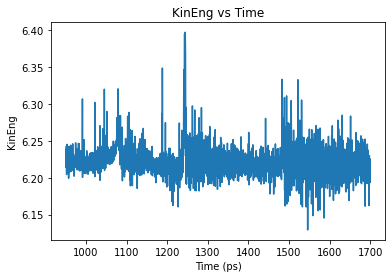

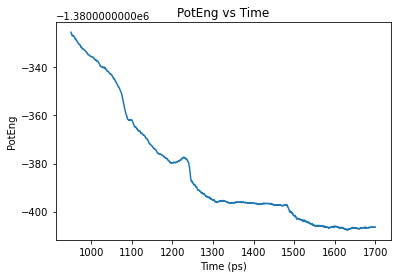

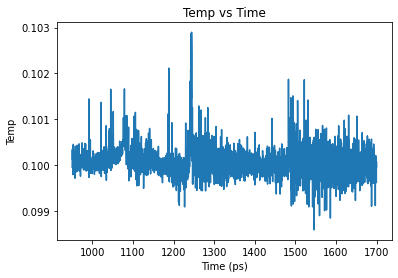

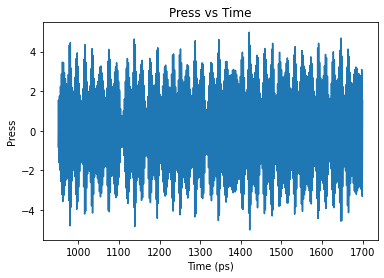

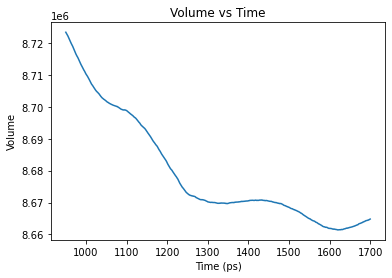

In [7]:
columns = ["KinEng", "PotEng", "Temp", "Press", "Volume"]
for column in columns:
    fig, ax = plt.subplots()
    ax.plot(data["Step"][skip_lines:]*dt, data[column][skip_lines:])
    ax.set_xlabel("Time (ps)")
    ax.set_ylabel(column)
    ax.set_title(f"{column} vs Time")

    # Save the figure to a file
    plt.savefig(f"{column}_vs_time.tif", dpi= 100, bbox_inches = 'tight', facecolor="w")
    plt.show()
    # Close the figure to free memory
    plt.close(fig)

In [5]:
directory_path = os.getcwd()
foldername = f'Output_{jid}'        # Folder name

new_directory_path = os.path.join(directory_path, foldername)
if not os.path.exists(new_directory_path):
    os.makedirs(new_directory_path)

# Move all the *.tif files to the new directory
tif_files = glob.glob("*.tif")
for file in tif_files:
    shutil.move(file, os.path.join(new_directory_path, file))
    
# shutil.move(log_file, os.path.join(new_directory_path, log_file))

In [6]:
# # Plot the data
# fig, axes = plt.subplots(5,1, figsize=(10, 20))
# axes = axes.flatten()

# columns = ["KinEng", "PotEng", "Temp", "Press", "Volume"]

# for idx, column in enumerate(columns):
#     axes[idx].plot(data["Step"]*dt, data[column])
#     axes[idx].set_xlabel("Time")
#     axes[idx].set_ylabel(column)
#     axes[idx].set_title(f"Time vs {column}")
# #     axes[idx].savefig(f"Time vs {column}", dpi= 100, bbox_inches = 'tight', facecolor="w")

# # plt.tight_layout()
# plt.show()